In [13]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#load data
data=sns.load_dataset("titanic")

In [56]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [57]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
data.tail(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [58]:
data.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [59]:
#check for missing values
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [60]:
#handle missing values
data['age'].fillna(data['age'].median(), inplace=True)
data['embarked']=data['embarked'].fillna('Unknown')
data['embark_town']=data['embark_town'].fillna("Unknown")
data['deck']=data['deck'].fillna(data['deck'].mode()[0])

In [61]:
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [65]:
#summary
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


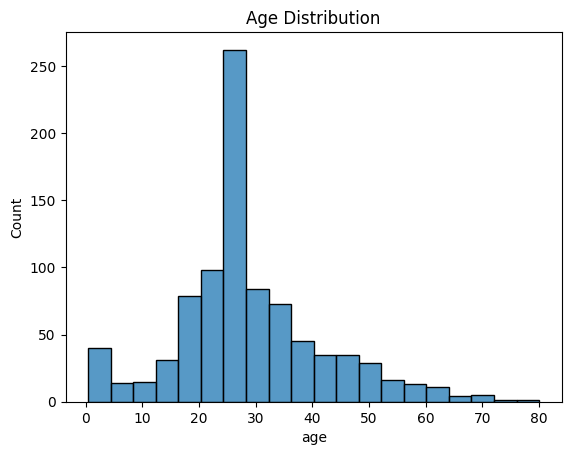

In [66]:
#distribution of numeric values
sns.histplot(data['age'],bins=20)
plt.title("Age Distribution")
plt.show()

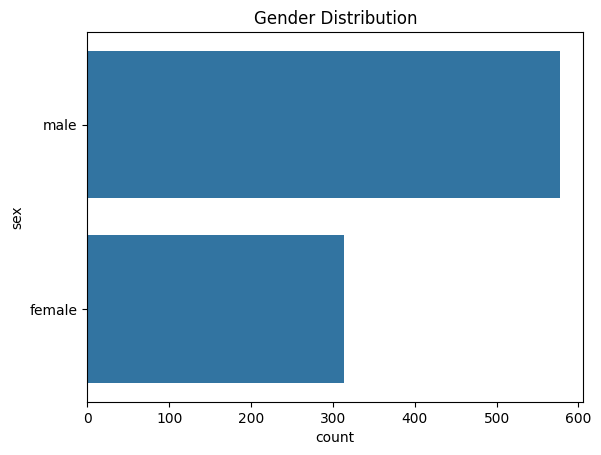

In [68]:
#ditribution of categorical values
sns.countplot(data['sex'])
plt.title("Gender Distribution")
plt.show()

In [73]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

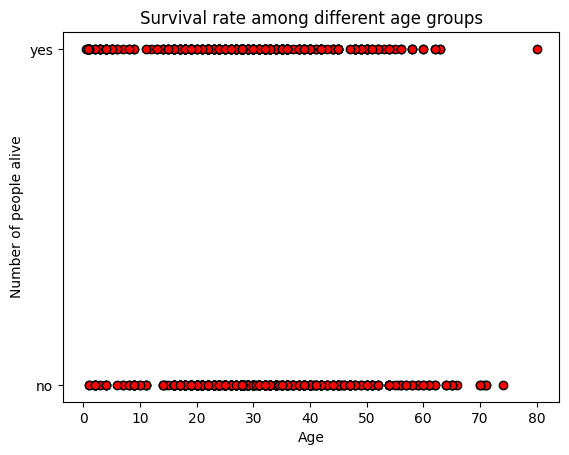

In [82]:
#survival by gender
plt.scatter(data['age'],data['alive'],color="red",edgecolor="black")
plt.title("Survival rate among different age groups")
plt.xlabel("Age")
plt.ylabel("Number of people alive")
plt.show()

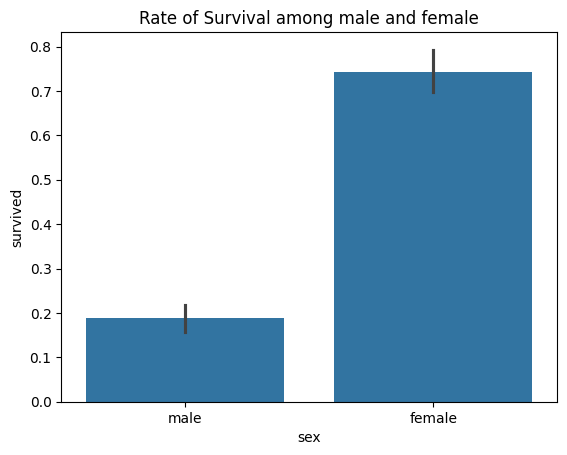

In [83]:
#survival by gender
sns.barplot(x="sex",y="survived",data=data)
plt.title("Rate of Survival among male and female")
plt.show()

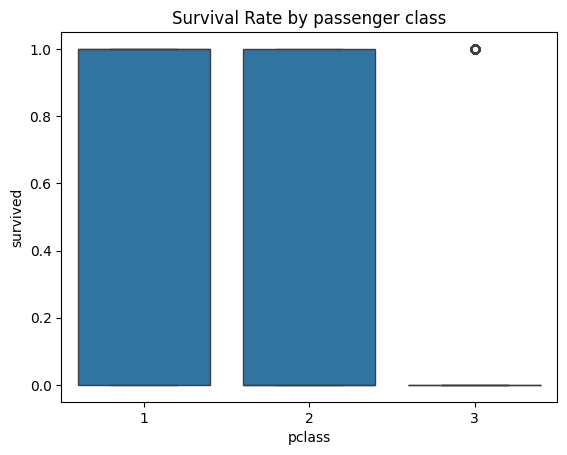

In [88]:
#survival by pclass
sns.boxplot(x="pclass",y="survived",data=data)
plt.title("Survival Rate by passenger class")
plt.show()

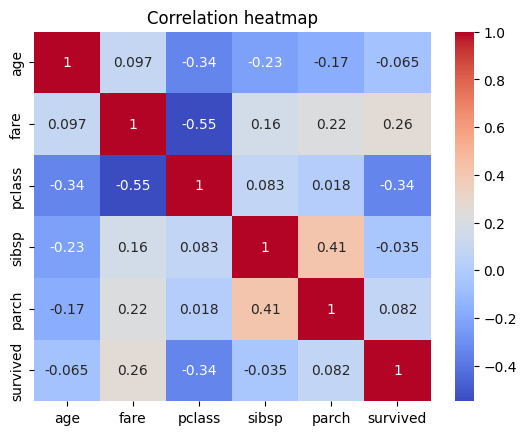

In [84]:
#correlation analysis
data_encoded=pd.get_dummies(data)
features = ['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived']
subset_corr=data_encoded[features].corr()
sns.heatmap(subset_corr,annot=True,cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

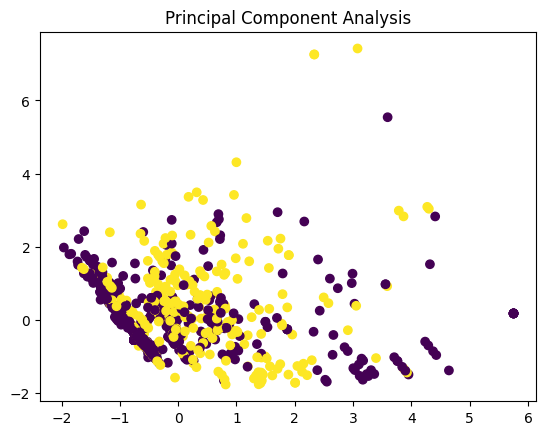

In [90]:
#dimensionality reduction using PCA to identify patterns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features=data[['age','fare','sibsp','parch']]
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

pca=PCA(n_components=2)
principal_components=pca.fit_transform(scaled_features)

plt.scatter(principal_components[:,0],principal_components[:,1],c=data['survived'],cmap="viridis")
plt.title("Principal Component Analysis")
plt.show()

